In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
df = pd.read_csv("uber - uber.csv")
# Drop unnamed index column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

In [13]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing Values:\n", df.isnull().sum())
print(df.describe())

Shape: (200000, 9)
Columns: ['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
Missing Values:
 Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787         7.720539   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.382535e+07       6.000000        -73.992065        40.734796   
50%    2.774550e+07       8.500000        -73.981823        40.752592   
75%    4.155530e+07      12.500000        -73.967153        40.767158

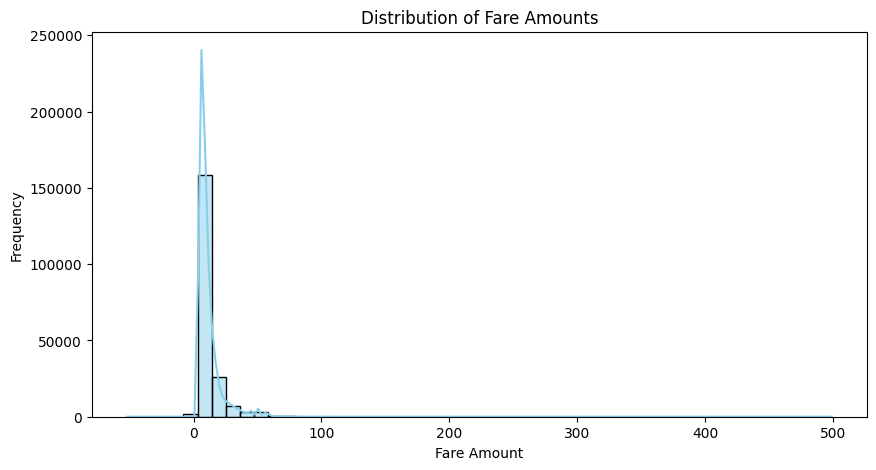

In [14]:
# Basic EDA visualization
plt.figure(figsize=(10, 5))
sns.histplot(df['fare_amount'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

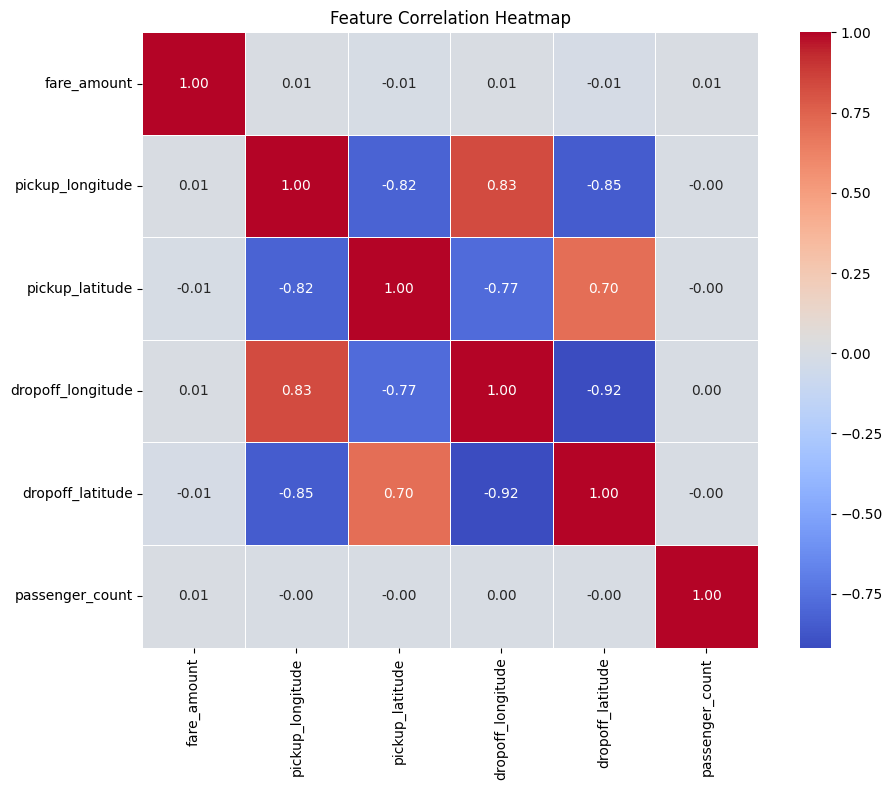

In [20]:
# Correlation heatmap
plt.figure(figsize=(10,8))
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt='.2f', square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [21]:
# ----- Data Preprocessing -----
df = df.dropna()
df_num = df.select_dtypes(include=['float64', 'int64'])
target = [c for c in df_num.columns if 'price' in c.lower() or 'fare' in c.lower()]
y = df_num[target[0]]
X = df_num.drop(columns=[target[0]])

In [22]:
# ----- Train/Test Split -----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# ----- Without PCA -----
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
lr = LinearRegression().fit(X_train_s, y_train)
pred = lr.predict(X_test_s)

In [ ]:
r2_no_pca = r2_score(y_test, pred)
rmse_no_pca = mean_squared_error(y_test, pred)
print("\nWithout PCA -> R2:", r2_no_pca, "RMSE:", rmse_no_pca)


Without PCA -> R2: 0.00034152697862199766 RMSE: 103.98840712661466


In [26]:
# ----- With PCA -----
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_s)
X_test_pca = pca.transform(X_test_s)
lr_pca = LinearRegression().fit(X_train_pca, y_train)
pred_pca = lr_pca.predict(X_test_pca)

In [28]:
r2_pca = r2_score(y_test, pred_pca)
rmse_pca = mean_squared_error(y_test, pred_pca)
print("With PCA -> R2:", r2_pca, "RMSE:", rmse_pca)
print("No. of PCA Components:", pca.n_components_)

With PCA -> R2: 0.00032381310046525336 RMSE: 103.99024979390882
No. of PCA Components: 3


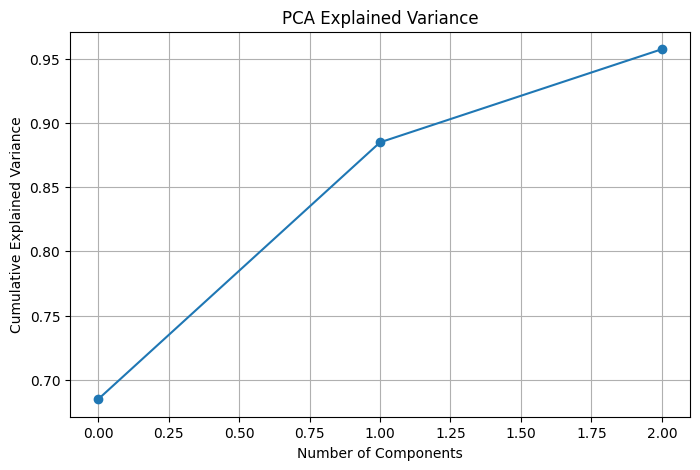

<Figure size 600x400 with 0 Axes>

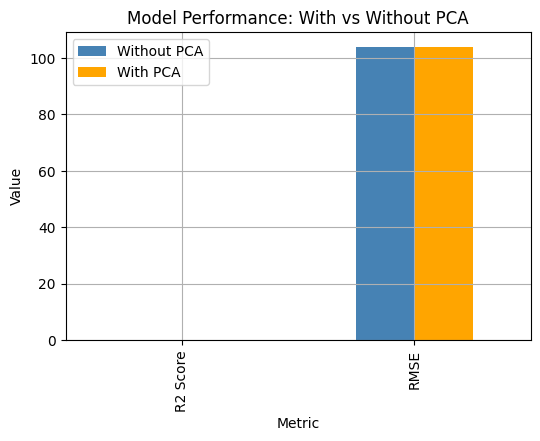

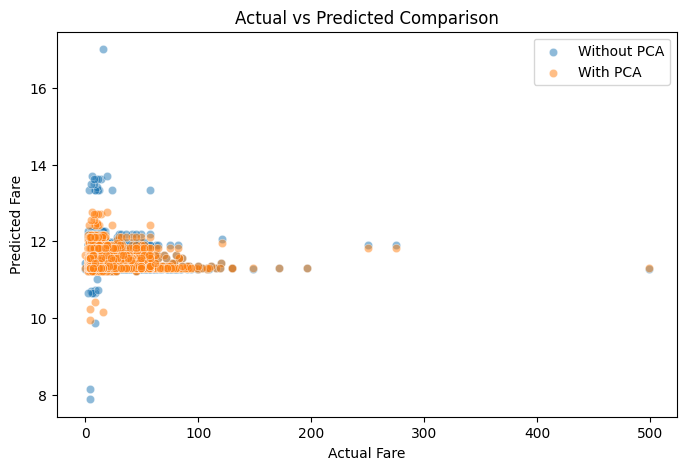

In [ ]:
# ----- Visual Comparisons -----
# Explained Variance Plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# R2 & RMSE Comparison
plt.figure(figsize=(6,4))
metrics = pd.DataFrame({
    'Metric': ['R2 Score', 'RMSE'],
    'Without PCA': [r2_no_pca, rmse_no_pca],
    'With PCA': [r2_pca, rmse_pca]
})
metrics.set_index('Metric').plot(kind='bar', figsize=(6,4), color=['steelblue','orange'])
plt.title('Model Performance: With vs Without PCA')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Actual vs Predicted (Optional for better understanding)
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=pred, label='Without PCA', alpha=0.5)
sns.scatterplot(x=y_test, y=pred_pca, label='With PCA', alpha=0.5)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Comparison")
plt.legend()
plt.show()